#Maria Oros
In this script, as a consequence of 1_explore_data.py, I will explore the data to:
 - Ensure data quality in three key aspects:
    - Handle missing information appropriately.
    - Verify and enforce correct data types.
    - Store the data in an appropriate format (e.g., Parquet).
  - Prepare a single, clean dataset to effectively address the questions in Task 2.

------- Instructions from Fetch --------
First: explore the data

Review the unstructured csv files and answer the following questions with code that supports your conclusions:

Are there any data quality issues present?
Are there any fields that are challenging to understand?
We recommend using SQL or python and data visualization to examine the data.


In [318]:
from os import times

import pandas as pd
import numpy as np
from pandas.core.computation.ops import isnumeric
import pandasql as ps

import matplotlib.pyplot as plt
import seaborn as sns
# Maria Oros

In [319]:
!pip install fastparquet


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [320]:
!pip install plotly
import plotly.express as px


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [321]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


# Reading the Data 1

In [322]:
# Reading files
products = pd.read_csv('../1_data/raw/PRODUCTS_TAKEHOME.csv', sep=',')
transaction = pd.read_csv('../1_data/raw/TRANSACTION_TAKEHOME.csv', sep=',')
user = pd.read_csv('../1_data/raw/USER_TAKEHOME.csv', sep=',')

# Understanding the data: PRODUCTS

I will explore the data and manage missings accordingly

In [323]:
products #print the data

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11
...,...,...,...,...,...,...,...
845547,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11
845548,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10
845549,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11
845550,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10


In [324]:
# Data Exploration step 1: Checking for missing values and data stats description
print("----------------------------------- Products")
print("\nProducts: Total ", len(products), " and Count of NaN in each column relative to the dataset total:\n", 100*products.isnull().sum()/len(products),
      "\nDescribe \n", products.describe(),
      "\nData types \n", products.dtypes)


----------------------------------- Products

Products: Total  845552  and Count of NaN in each column relative to the dataset total:
 CATEGORY_1       0.013128
CATEGORY_2       0.168411
CATEGORY_3       7.162895
CATEGORY_4      92.021898
MANUFACTURER    26.784160
BRAND           26.783923
BARCODE          0.476020
dtype: float64 
Describe 
             BARCODE
count  8.415270e+05
mean   6.016109e+11
std    1.022530e+12
min    1.850000e+02
25%    7.124923e+10
50%    6.344185e+11
75%    7.683955e+11
max    6.291108e+13 
Data types 
 CATEGORY_1       object
CATEGORY_2       object
CATEGORY_3       object
CATEGORY_4       object
MANUFACTURER     object
BRAND            object
BARCODE         float64
dtype: object


In [325]:
# The number of rows where BARCODE is missing is 4025 out of 845552, products clean is the dataset now
products_clean = products[~products['BARCODE'].isna()]

print(len(products), len(products)-len(products_clean))

845552 4025


In [331]:
#saving the data for later usage
products_clean.to_parquet('../1_data/processed/PRODUCTS_TAKEHOME_clean.parquet')


## Exploring the dataset now in terms of categories and manufacturer, this will help to understand what products are provided by manufacturer.

In [332]:
# Number of observations in the dataset, count by barcode
products.groupby(['MANUFACTURER','CATEGORY_1','CATEGORY_2',
                  'CATEGORY_3','CATEGORY_4'])['BARCODE'].count()

MANUFACTURER         CATEGORY_1         CATEGORY_2              CATEGORY_3                               CATEGORY_4                 
1-800-FLOWERS, INC.  Snacks             Puffed Snacks           Popcorn                                  Already Popped Popcorn         224
                                                                                                         Microwave Popcorn                2
1111FOURONE          Health & Wellness  Hair Care               Hair Tools                               Hair Dryers                      2
                                        Hair Removal            Shaving Gel & Cream                      Women's Shaving Gel & Cream      1
18.21 MAN MADE, LLC  Health & Wellness  Hair Removal            Shaving Gel & Cream                      Women's Shaving Gel & Cream      2
                                                                                                                                       ... 
ZIOKOK               Health

Categories correspond to classification of the product in a hierarchical way. Category 4 can be missing because of lack of standard classification of items at such granularity.

In [333]:
products.columns


Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')

In [334]:
df = products.groupby('MANUFACTURER')['BARCODE'].count()

df

MANUFACTURER
1-800-FLOWERS, INC.                434
1-800-SHAVED-ICE, LLC               11
1111FOURONE                          9
1440 FOODS COMPANY                 178
18.21 MAN MADE, LLC                 12
                                  ... 
ZOMICKS KOSHER KAFE & BAKE SHOP      1
ZORLU USA, INC.                     11
ZOTOS INTERNATIONAL INC              5
ZURU LLC                            12
ZWANENBERG FOOD GROUP (USA)          3
Name: BARCODE, Length: 4354, dtype: int64

In [328]:
products.columns

Index(['CATEGORY_1', 'CATEGORY_2', 'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER',
       'BRAND', 'BARCODE'],
      dtype='object')

# Visualizations of the data by categories of MANUFACTURER and BRAND
This will help to explore the data and contrast against the question 2 later.

/var/folders/93/h3g2jvn15rs8w2h9w6hcv55h0000gn/T/ipykernel_5077/3203591910.py:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




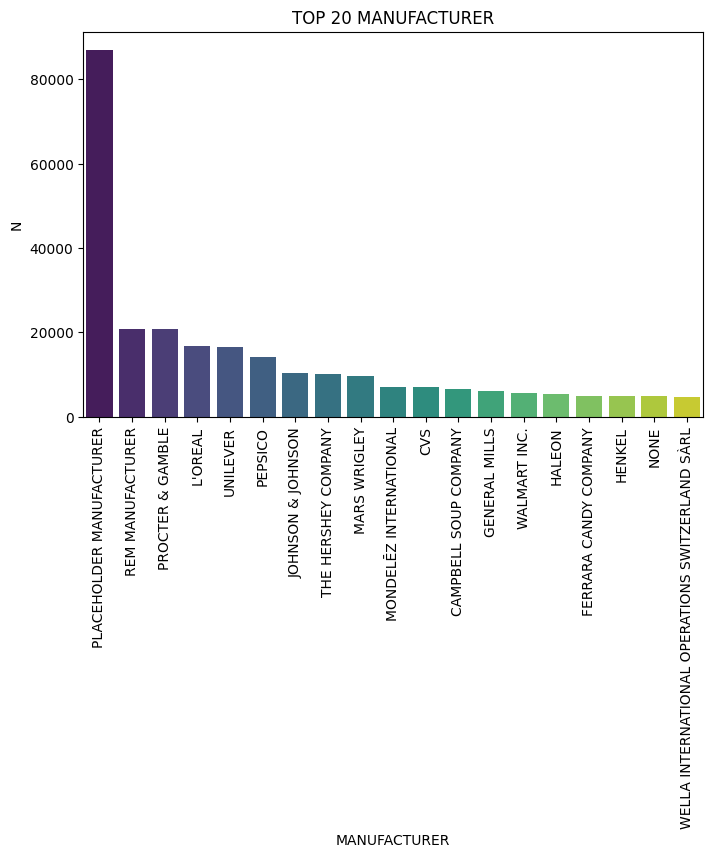

In [335]:
## number of observations per MANUFACTURER, top 20 with more obs
# SQL Query to filter, group, and sort
query = """
SELECT MANUFACTURER, COUNT(BARCODE) AS N
FROM products
GROUP BY MANUFACTURER
ORDER BY N DESC
LIMIT 20
"""


top_brands = ps.sqldf(query, locals())
plt.figure(figsize=(8, 5))

# Plot
sns.barplot(data=top_brands, x="MANUFACTURER", y="N", palette="viridis")

# Customize labels and title
plt.xlabel("MANUFACTURER")
plt.ylabel("N")
plt.title("TOP 20 MANUFACTURER")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()




/var/folders/93/h3g2jvn15rs8w2h9w6hcv55h0000gn/T/ipykernel_5077/1963408216.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




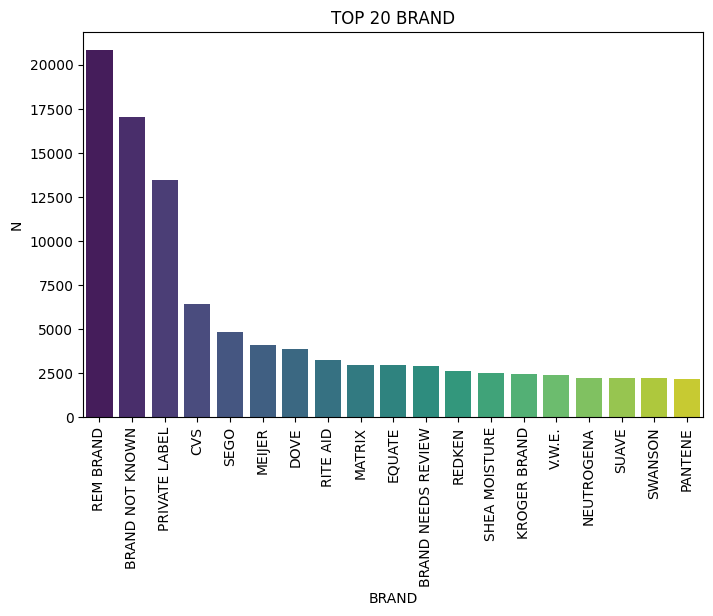

In [336]:
## number of observations per brand, top 20 with more obs
query = """
SELECT BRAND, COUNT(BARCODE) AS N
FROM products
GROUP BY BRAND
ORDER BY N DESC
LIMIT 20
"""
top_brands = ps.sqldf(query, locals())

plt.figure(figsize=(8, 5))

# Plot
sns.barplot(data=top_brands, x="BRAND", y="N", palette="viridis")

# Customize labels and title
plt.xlabel("BRAND")
plt.ylabel("N")
plt.title("TOP 20 BRAND")

# Rotate x-axis labels
plt.xticks(rotation=90)

# Show the plot
plt.show()




CONCLUSIONS ON THE QUESTIONS:
Are there any data quality issues present?
    YES, MISSINGS:
    From 1-4 categories, the Category 4 has 92% of the total data as missing, wonder if it is an issue on how the data is captured or nature of the business eg no standard categorization of item at that level
    Barcode has missings .047% of missings: this is relevant because bar code matches wIth Products table, in such case as as those are few, need to be excluded when merging tables.
    Manufacturer and brand are also with missing information (26% of the data): relevant if a research question is about that information

Are there any fields that are challenging to understand?
    Not sure how to interpret this question. For this table, fields were descriptive by the name and values but would be helpful to have the description of the categories 1-4 and how the such labels are created, so then it can be clear how to interpret those.

## Transactions

- Explore the data visually and by its statistics

In [337]:
transaction.head(20) #Check

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
6,000550b2-1480-4c07-950f-ff601f242152,2024-07-06,2024-07-06 19:27:48.586 Z,WALMART,5f850bc9cf9431165f3ac175,4.920091e+10,1.00,
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
8,000e1d35-15e5-46c6-b6b3-33653ed3d27e,2024-08-13,2024-08-13 18:21:07.931 Z,WALMART,61a6d926f998e47aad33db66,5.200001e+10,1.00,
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29


In [338]:
print("----------------------------------- Transaction")
print("\nTransaction: Total ", len(transaction), " and Count of NaN in each column relative to the dataset total:\n", 100*transaction.isnull().sum()/len(transaction), "\nDescribe \n", transaction.describe(), "\nData types \n", transaction.dtypes)

----------------------------------- Transaction

Transaction: Total  50000  and Count of NaN in each column relative to the dataset total:
 RECEIPT_ID         0.000
PURCHASE_DATE      0.000
SCAN_DATE          0.000
STORE_NAME         0.000
USER_ID            0.000
BARCODE           11.524
FINAL_QUANTITY     0.000
FINAL_SALE         0.000
dtype: float64 
Describe 
             BARCODE
count  4.423800e+04
mean   1.715863e+11
std    3.269219e+11
min   -1.000000e+00
25%    3.077212e+10
50%    5.210004e+10
75%    8.536765e+10
max    9.347108e+12 
Data types 
 RECEIPT_ID         object
PURCHASE_DATE      object
SCAN_DATE          object
STORE_NAME         object
USER_ID            object
BARCODE           float64
FINAL_QUANTITY     object
FINAL_SALE         object
dtype: object


In [339]:
transaction[transaction['FINAL_QUANTITY']=='zero']

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49
5,0002d8cd-1701-4cdd-a524-b70402e2dbc0,2024-06-24,2024-06-24 19:44:54.247 Z,WALMART,5dcc6c510040a012b8e76924,6.811314e+11,zero,1.46
7,00096c49-8b04-42f9-88ce-941c5e06c4a7,2024-08-19,2024-08-21 17:35:21.902 Z,TARGET,6144f4f1f3ef696919f54b5c,7.830007e+10,zero,3.59
9,0010d87d-1ad2-4e5e-9a25-cec736919d15,2024-08-04,2024-08-04 18:01:47.787 Z,ALDI,66686fc2e04f743a096ea808,NaN,zero,2.29
...,...,...,...,...,...,...,...,...
24991,ffebda11-ff18-46e0-8455-cef0679558cc,2024-08-03,2024-08-13 18:36:52.294 Z,DOLLAR GENERAL STORE,65935f6499b40f103b64fc0c,7.940059e+10,zero,4.25
24993,ffef10cb-52ac-4123-aa87-0d65e85b6ef7,2024-07-21,2024-07-27 19:44:19.898 Z,WALMART,65bfb83d7050d0a6206c7b15,7.940045e+10,zero,6.97
24995,fff60bb7-bf93-4e6b-8055-4d7688da7ead,2024-08-29,2024-08-29 23:47:50.471 Z,WALMART,5eb887f71699c213b1abe2e1,7.874221e+10,zero,1.23
24997,fffbb112-3cc5-47c2-b014-08db2f87e0c7,2024-07-30,2024-08-04 11:43:31.474 Z,WALMART,5eb59d6be7012d13941af5e2,8.180000e+11,zero,4.88


- Some fields as dates are not date types, need to treat properly.
- FINAL_SALE and FINAL_NUMERIC are both character types, but the entity relation model indicate should be numeric.
- Additionally, there are observations where FINAL_QUANTITY is with value 'zero' but FINAL_SALE is not a numerical value for such rows. Hard to do an interpretation of this cases. Some of them came from a not valid BARCODE = -1, as it is shown above.
- FINAL_SALE for missing data, is the interpretation to be zero?


In [35]:
transaction.groupby('FINAL_QUANTITY')['RECEIPT_ID'].count() #some quantities are less than 1 eg .7, .9, does not make sense

FINAL_QUANTITY
0.01        1
0.04        1
0.09        2
0.23        4
0.24        1
        ...  
6.22        1
7.00        7
8.00        8
9.00        3
zero    12500
Name: RECEIPT_ID, Length: 87, dtype: int64

In [36]:
transaction.groupby(['FINAL_QUANTITY','FINAL_SALE'])['RECEIPT_ID'].count()


FINAL_QUANTITY  FINAL_SALE
0.01            0.05           1
0.04            0.24           1
0.09                           1
                0.12           1
0.23                           1
                              ..
zero            9.96           9
                9.97          30
                9.98          35
                9.99          68
                90.00          1
Name: RECEIPT_ID, Length: 3141, dtype: int64

In [301]:
transaction['FINAL_QUANTITY_NUMERIC'] = transaction['FINAL_QUANTITY'].apply(lambda x: float(x) if x != 'zero' else 0.0)

transaction_clean = transaction[
    (transaction['FINAL_QUANTITY_NUMERIC'] >= 1.0) | (transaction['FINAL_QUANTITY_NUMERIC'] <= 0.0)] #excluding those that does not make sense

print(len(transaction_clean))

49968


In [310]:
#lets observe the data
transaction_clean['FINAL_QUANTITY_NUMERIC'].describe()



count    49968.000000
mean         0.814621
std          1.842353
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY_NUMERIC, dtype: float64

In [312]:
# Final sale numeric

transaction_clean['FINAL_SALE_NUMERIC'] = transaction_clean['FINAL_SALE'].apply(
    lambda x: 0.0 if pd.isna(x) or x == '' else float(x) if str(x).strip().replace('.', '', 1).isdigit() else np.nan
)
transaction_clean[['FINAL_SALE','FINAL_SALE_NUMERIC']]

,FINAL_SALE,FINAL_SALE_NUMERIC
0,,NaN
1,1.49,1.49
2,,NaN
3,3.49,3.49
4,,NaN
...,...,...
49995,1.18,1.18
49996,2.00,2.00
49997,20.96,20.96
49998,3.00,3.00


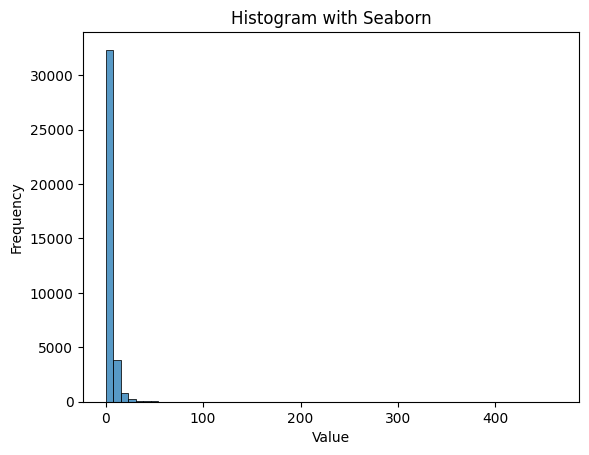

In [315]:
data = transaction_clean['FINAL_SALE_NUMERIC'].values

sns.histplot(data, bins=60, kde=False)


plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram with Seaborn")

plt.show()

In [313]:
#lets observe the data
transaction_clean['FINAL_SALE_NUMERIC'].describe()

count    37476.000000
mean         4.578124
std          6.627247
min          0.000000
25%          1.790000
50%          3.000000
75%          5.190000
max        462.820000
Name: FINAL_SALE_NUMERIC, dtype: float64

In [317]:
transaction_clean[transaction_clean['FINAL_SALE_NUMERIC'].isna()]['FINAL_QUANTITY_NUMERIC'].describe()

count    12492.000000
mean         1.090929
std          2.498554
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        276.000000
Name: FINAL_QUANTITY_NUMERIC, dtype: float64

In [ ]:
transaction_clean['FINAL_SALE_NUMERIC']=transaction_clean['FINAL_SALE_NUMERIC'].fillna(0)


In [93]:
transaction_clean

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539 Z,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,,1.0,0.00
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206 Z,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813 Z,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,,1.0,0.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468 Z,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549 Z,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634 Z,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18,2.0,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736 Z,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00,1.0,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816 Z,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96,1.0,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211 Z,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00,1.0,3.00


In [94]:
## dates
pd.set_option('copy_on_write', True)
transaction_clean['PURCHASE_DATE'] = pd.to_datetime(transaction_clean['PURCHASE_DATE'])
#pd.to_datetime(transaction_clean['PURCHASE_DATE'], format='%d%b%Y:%H:%M:%S.%f')
transaction_clean["SCAN_DATE"] = pd.to_datetime(transaction_clean['SCAN_DATE'])
transaction_clean
#transaction_clean['PURCHASE_DATE_DATE']=transaction_clean['PURCHASE_DATE'].as.times()

,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC
0,0000d256-4041-4a3e-adc4-5623fb6e0c99,2024-08-21,2024-08-21 14:19:06.539000+00:00,WALMART,63b73a7f3d310dceeabd4758,1.530001e+10,1.00,,1.0,0.00
1,0001455d-7a92-4a7b-a1d2-c747af1c8fd3,2024-07-20,2024-07-20 09:50:24.206000+00:00,ALDI,62c08877baa38d1a1f6c211a,NaN,zero,1.49,0.0,1.49
2,00017e0a-7851-42fb-bfab-0baa96e23586,2024-08-18,2024-08-19 15:38:56.813000+00:00,WALMART,60842f207ac8b7729e472020,7.874223e+10,1.00,,1.0,0.00
3,000239aa-3478-453d-801e-66a82e39c8af,2024-06-18,2024-06-19 11:03:37.468000+00:00,FOOD LION,63fcd7cea4f8442c3386b589,7.833997e+11,zero,3.49,0.0,3.49
4,00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1,2024-07-04,2024-07-05 15:56:43.549000+00:00,RANDALLS,6193231ae9b3d75037b0f928,4.790050e+10,1.00,,1.0,0.00
...,...,...,...,...,...,...,...,...,...,...
49995,b5cd61a9-8033-4913-a5c4-fb3f65e3a321,2024-08-21,2024-08-31 14:13:08.634000+00:00,TARGET,6154bcf098f885648de2f299,8.523911e+10,2.00,1.18,2.0,1.18
49996,e1b2f634-c9ad-4152-b662-4b22efc25862,2024-08-11,2024-08-11 18:15:56.736000+00:00,STOP & SHOP,60aa809f188b926b2244c974,4.610040e+10,1.00,2.00,1.0,2.00
49997,b07ef8dd-e444-40a2-819b-f74a3e5f1ae7,2024-07-11,2024-07-11 08:03:25.816000+00:00,WALMART,60bd26e83dc3b13a15c5f4e7,6.466300e+11,1.00,20.96,1.0,20.96
49998,42475141-bef4-4df2-aa37-72577e2512bb,2024-06-18,2024-06-18 19:57:32.211000+00:00,MARKET BASKET,6169912fac47744405af62b7,4.180050e+10,1.00,3.00,1.0,3.00


CONCLUSIONS ON THE QUESTIONS:
* Are there any data quality issues present?
    - YES, MISSINGS:
    seems to be the data set with more complete data, the only field with missing information is BARCODE about 11% onf the total entries
    - DATA TYPES:
    FINAL_QUANTITY and FINAL_SALE are not numeric but combining strings to represent zero, final quantity reported fractions of number eg .6 which does not makes much sense at frst instace, there were quantities=1 with a final sale missing, seems like an inconsistency.

* Are there any fields that are challenging to understand?
    - Fields were very descriptive them-selves, but some values did not make sense as the FINAL_QUANTITY reporting fractions lower than 1. wondering f that is the case of poor collection fo data, data processing.

In [226]:
transaction_clean.to_csv('../1_data/raw/TRANSACTION_TAKEHOME_clean.csv')

## User

In [106]:
user

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54.000 Z,2000-08-11 00:00:00.000 Z,CA,es-419,female
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55.000 Z,2001-09-24 04:00:00.000 Z,PA,en,female
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18.000 Z,1994-10-28 00:00:00.000 Z,FL,es-419,female
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22.000 Z,NaN,NC,en,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50.000 Z,1972-03-19 00:00:00.000 Z,PA,en,female
...,...,...,...,...,...,...
99995,61fc06d41febf771966da8fa,2022-02-03 16:46:12.000 Z,1992-03-16 08:00:00.000 Z,CA,en,female
99996,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39.000 Z,1993-09-23 05:00:00.000 Z,MO,en,female
99997,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05.000 Z,1983-04-19 00:00:00.000 Z,RI,en,female
99998,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04.000 Z,1995-06-09 04:00:00.000 Z,DE,en,female


In [107]:
user.columns

Index(['ID', 'CREATED_DATE', 'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER'], dtype='object')

In [108]:
print("----------------------------------- User")
print("\nUser: Total ", len(user), " and Count of NaN in each column relative to the dataset total:\n", 100*user.isnull().sum()/len(user), "\nDescribe \n", user.describe(), "\nData types \n", user.dtypes)

----------------------------------- User

User: Total  100000  and Count of NaN in each column relative to the dataset total:
 ID               0.000
CREATED_DATE     0.000
BIRTH_DATE       3.675
STATE            4.812
LANGUAGE        30.508
GENDER           5.892
dtype: float64 
Describe 
                               ID               CREATED_DATE  \
count                     100000                     100000   
unique                    100000                      99942   
top     5ef3b4f17053ab141787697d  2023-01-12 18:30:15.000 Z   
freq                           1                          2   

                       BIRTH_DATE  STATE LANGUAGE  GENDER  
count                       96325  95188    69492   94108  
unique                      54721     52        2      11  
top     1970-01-01 00:00:00.000 Z     TX       en  female  
freq                         1272   9028    63403   64240   
Data types 
 ID              object
CREATED_DATE    object
BIRTH_DATE      object
STATE    

In [115]:
user_clean = user
user_clean['CREATED_DATE'] = pd.to_datetime(user_clean['CREATED_DATE'])


In [227]:
user_clean.to_csv('../1_data/raw/USER_TAKEHOME_clean.csv')


In [117]:
user_clean[['CREATED_DATE']]

,CREATED_DATE
0,2020-06-24 20:17:54+00:00
1,2021-01-03 19:53:55+00:00
2,2023-05-31 18:42:18+00:00
3,2023-12-26 01:46:22+00:00
4,2023-10-28 11:51:50+00:00
...,...
99995,2022-02-03 16:46:12+00:00
99996,2022-12-08 13:34:39+00:00
99997,2022-11-22 23:45:05+00:00
99998,2020-07-14 16:50:04+00:00


CONCLUSIONS
ON
THE
QUESTIONS:
* Are there any data quality issues present?
    - YES, MISSINGS: mostly on the field called LANGUAGE, and other socio demographics. Important that ID and CREATED_DATE are not missings
    - DATA TYPES: CREATED_DATE and BIRTH_DATE are characters

* Are there any fields that are challenging to understand?
    - Fields were very descriptive

# Challenge 2

## Merging clean datasets

In [228]:
print('-------------------------> Merging')
# Merge Transactions with Users
merged_df1 = transaction_clean.merge(user_clean, left_on="USER_ID", right_on="ID", how="left")

# Merge with Products
merged_df = merged_df1.merge(products_clean, on="BARCODE", how="left")

#check the dataset
print(merged_df.head())

print('merged_df1 = transaction and users: ',len(merged_df1),' from results', len(transaction))

print('merged_df = transaction and products: ',len(merged_df),' from previous ',len(merged_df1), ' and products ',len(products))

-------------------------> Merging
                             RECEIPT_ID PURCHASE_DATE  \
0  0000d256-4041-4a3e-adc4-5623fb6e0c99    2024-08-21   
1  0001455d-7a92-4a7b-a1d2-c747af1c8fd3    2024-07-20   
2  00017e0a-7851-42fb-bfab-0baa96e23586    2024-08-18   
3  000239aa-3478-453d-801e-66a82e39c8af    2024-06-18   
4  00026b4c-dfe8-49dd-b026-4c2f0fd5c6a1    2024-07-04   

                   SCAN_DATE STORE_NAME                   USER_ID  \
0  2024-08-21 14:19:06.539 Z    WALMART  63b73a7f3d310dceeabd4758   
1  2024-07-20 09:50:24.206 Z       ALDI  62c08877baa38d1a1f6c211a   
2  2024-08-19 15:38:56.813 Z    WALMART  60842f207ac8b7729e472020   
3  2024-06-19 11:03:37.468 Z  FOOD LION  63fcd7cea4f8442c3386b589   
4  2024-07-05 15:56:43.549 Z   RANDALLS  6193231ae9b3d75037b0f928   

        BARCODE FINAL_QUANTITY FINAL_SALE  FINAL_QUANTITY_NUMERIC  \
0  1.530001e+10           1.00                                1.0   
1           NaN           zero       1.49                     0.0   


In [229]:
merged_df["BIRTH_DATE"] = pd.to_datetime(merged_df['BIRTH_DATE'], errors='coerce')
merged_df["CREATED_DATE"] = pd.to_datetime(merged_df['CREATED_DATE'], errors='coerce')

# create AGE_WHEN_CREATION years between birth date and date of creation both from USERS table
merged_df['AGE_WHEN_CREATION'] = merged_df.apply(
    lambda row: np.floor((row['CREATED_DATE'] - row['BIRTH_DATE']).days / 365.25)
    if pd.notnull(row['CREATED_DATE']) and pd.notnull(row['BIRTH_DATE']) else np.nan,
    axis=1
)

merged_df['PURCHASE_DATE_CT'] = pd.to_datetime(merged_df['PURCHASE_DATE'])
merged_df['PURCHASE_DATE_CT'] = merged_df['PURCHASE_DATE_CT'].dt.tz_localize('UTC')


merged_df['TIME_AS_USER_WHEN_PURCHASING'] = merged_df.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['CREATED_DATE']).days / 365.25)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['CREATED_DATE']) else np.nan,
    axis=1
)

merged_df['TIME_AS_USER_WHEN_PURCHASING_MO'] = merged_df.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['CREATED_DATE']).days / 30.4375)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['CREATED_DATE']) else np.nan,
    axis=1
)

print(len(merged_df))

49992


In [231]:
merged_df.columns

Index(['RECEIPT_ID', 'PURCHASE_DATE', 'SCAN_DATE', 'STORE_NAME', 'USER_ID',
       'BARCODE', 'FINAL_QUANTITY', 'FINAL_SALE', 'FINAL_QUANTITY_NUMERIC',
       'FINAL_SALE_NUMERIC', 'BARCODE_str_x', 'ID', 'CREATED_DATE',
       'BIRTH_DATE', 'STATE', 'LANGUAGE', 'GENDER', 'CATEGORY_1', 'CATEGORY_2',
       'CATEGORY_3', 'CATEGORY_4', 'MANUFACTURER', 'BRAND', 'BARCODE_str_y',
       'AGE_WHEN_CREATION', 'PURCHASE_DATE_CT', 'TIME_AS_USER_WHEN_PURCHASING',
       'TIME_AS_USER_WHEN_PURCHASING_MO'],
      dtype='object')

In [236]:
merged_df['FINAL_SALE_NUMERIC'].unique()

array([  nan,  1.49,  3.49, ..., 11.02, 20.17, 42.38])

## Challenge 2:

In [254]:
#Q1: What are the top 5 brands by sales among users that have had their account for at least six months?
# step 1: users with at least 6 mo from the creation date to the purchase date

users6=merged_df[merged_df['TIME_AS_USER_WHEN_PURCHASING_MO']>=6]
#group by brand
gbrand=users6.groupby('BRAND')['FINAL_SALE_NUMERIC'].sum().reset_index()
# Top 5
gbrand.sort_values('FINAL_SALE_NUMERIC', ascending=False)[:5]

,BRAND,FINAL_SALE_NUMERIC
8,CVS,72.00
50,TRIDENT,46.72
12,DOVE,42.88
6,COORS LIGHT,34.96
2,AXE,15.98


In [255]:
gbrand.sort_values('FINAL_SALE_NUMERIC', ascending=False)[:5].BRAND


8             CVS
50        TRIDENT
12           DOVE
6     COORS LIGHT
2             AXE
Name: BRAND, dtype: object

In [257]:
!pip install pandasql

  Preparing metadata (setup.py) ... done
  Obtaining dependency information for sqlalchemy from https://files.pythonhosted.org/packages/f5/76/297c532ea77c90e858a2967ba8ed62e8d9c503edc968b0c875361631cf1f/SQLAlchemy-2.0.38-cp39-cp39-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.6 MB/s eta 0:00:0000:0100:01
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26771 sha256=7dd2e5f722e775483e3aac8e804128d52e5b3f6adb32c8336cef34755c974447
  Stored in directory: /Users/mariaoros/Library/Caches/pip/wheels/63/e8/ec/75b1df467ecf57b6ececb32cb16f4e86697cbfe55cb0c51f07
Successfully built pandasql

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [259]:
## SQL based
import pandasql as ps


query = """
SELECT BRAND, SUM(FINAL_SALE_NUMERIC) AS total_sales
FROM merged_df
WHERE TIME_AS_USER_WHEN_PURCHASING_MO >= 6
GROUP BY BRAND
ORDER BY total_sales DESC
LIMIT 6
"""

# Execute SQL query on DataFrame
top_brands = ps.sqldf(query, locals())

# Display result
print(top_brands)


         BRAND  total_sales
0         None       337.89
1          CVS        72.00
2      TRIDENT        46.72
3         DOVE        42.88
4  COORS LIGHT        34.96
5          AXE        15.98


In [ ]:
# Which is the leading brand in the Dips & Salsa category?


In [ ]:
# At what percent has Fetch grown year over year?

In [213]:
#I will assume CT for simplicity, won't impact results as I'm not considering hours strictly
users_transactions_inner['PURCHASE_DATE_CT'] = pd.to_datetime(users_transactions_inner['PURCHASE_DATE'])
users_transactions_inner['PURCHASE_DATE_CT'] = users_transactions_inner['PURCHASE_DATE_CT'].dt.tz_localize('UTC')


users_transactions_inner['TIME_AS_USER_WHEN_PURCHASING'] = users_transactions_inner.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['CREATED_DATE']).days / 365.25)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['CREATED_DATE']) else np.nan,
    axis=1
)

users_transactions_inner['TIME_AS_USER_WHEN_PURCHASING_MO'] = users_transactions_inner.apply(
    lambda row: np.floor((row['PURCHASE_DATE_CT'] - row['CREATED_DATE']).days / 30.4375)
    if pd.notnull(row['PURCHASE_DATE_CT']) and pd.notnull(row['CREATED_DATE']) else np.nan,
    axis=1
)


In [214]:
# check
cols=["BIRTH_DATE","CREATED_DATE",'AGE_WHEN_CREATION','PURCHASE_DATE','PURCHASE_DATE_CT','TIME_AS_USER_WHEN_PURCHASING','TIME_AS_USER_WHEN_PURCHASING_MO']
users_transactions_inner[cols]

,BIRTH_DATE,CREATED_DATE,AGE_WHEN_CREATION,PURCHASE_DATE,PURCHASE_DATE_CT,TIME_AS_USER_WHEN_PURCHASING,TIME_AS_USER_WHEN_PURCHASING_MO
0,1958-09-27 00:00:00+00:00,2022-07-04 15:13:50+00:00,63.0,2024-06-12,2024-06-12 00:00:00+00:00,1.0,23.0
1,1958-09-27 00:00:00+00:00,2022-07-04 15:13:50+00:00,63.0,2024-06-12,2024-06-12 00:00:00+00:00,1.0,23.0
2,1979-01-23 00:00:00+00:00,2020-12-12 17:18:00+00:00,41.0,2024-08-30,2024-08-30 00:00:00+00:00,3.0,44.0
3,1979-01-23 00:00:00+00:00,2020-12-12 17:18:00+00:00,41.0,2024-08-30,2024-08-30 00:00:00+00:00,3.0,44.0
4,1982-09-27 06:00:00+00:00,2018-07-10 02:01:04+00:00,35.0,2024-07-22,2024-07-22 00:00:00+00:00,6.0,72.0
...,...,...,...,...,...,...,...
257,1955-02-19 05:00:00+00:00,2020-09-18 20:30:09+00:00,65.0,2024-09-06,2024-09-06 00:00:00+00:00,3.0,47.0
258,1955-02-19 05:00:00+00:00,2020-09-18 20:30:09+00:00,65.0,2024-09-06,2024-09-06 00:00:00+00:00,3.0,47.0
259,1955-02-19 05:00:00+00:00,2020-09-18 20:30:09+00:00,65.0,2024-09-06,2024-09-06 00:00:00+00:00,3.0,47.0
260,1955-02-19 05:00:00+00:00,2020-09-18 20:30:09+00:00,65.0,2024-09-06,2024-09-06 00:00:00+00:00,3.0,47.0


In [215]:
# saving as csv, could be a parquet but no need for much computation not
users_transactions_inner.to_csv('../1_data/processed/users_transactions_inner.csv')

In [216]:
#left join to compare against the inner, seems like there is a bg gap
users_transactions = user_clean.merge(
    transaction_clean,
    left_on='ID',
    right_on='USER_ID',
    how='left'
)
(users_transactions)

,ID,CREATED_DATE,BIRTH_DATE,STATE,LANGUAGE,GENDER,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC,BARCODE_str
0,5ef3b4f17053ab141787697d,2020-06-24 20:17:54+00:00,2000-08-11 00:00:00.000 Z,CA,es-419,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5ff220d383fcfc12622b96bc,2021-01-03 19:53:55+00:00,2001-09-24 04:00:00.000 Z,PA,en,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6477950aa55bb77a0e27ee10,2023-05-31 18:42:18+00:00,1994-10-28 00:00:00.000 Z,FL,es-419,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,658a306e99b40f103b63ccf8,2023-12-26 01:46:22+00:00,NaN,NC,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,653cf5d6a225ea102b7ecdc2,2023-10-28 11:51:50+00:00,1972-03-19 00:00:00.000 Z,PA,en,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100166,61fc06d41febf771966da8fa,2022-02-03 16:46:12+00:00,1992-03-16 08:00:00.000 Z,CA,en,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100167,6391e7ef90ad5449ec5f782d,2022-12-08 13:34:39+00:00,1993-09-23 05:00:00.000 Z,MO,en,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100168,637d5efdd6f2a49c49934dcb,2022-11-22 23:45:05+00:00,1983-04-19 00:00:00.000 Z,RI,en,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100169,5f0de23b05d8a6147dc0cafa,2020-07-14 16:50:04+00:00,1995-06-09 04:00:00.000 Z,DE,en,female,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
len(users_transactions), len(transaction_clean), len(user_clean) #big gap

(100171, 49968, 100000)

In [136]:
# BARCODE as a key that help to merge tables will be better managed as string
products_clean['BARCODE_str'] = products_clean['BARCODE'].astype(str)

transaction_clean['BARCODE_str'] = transaction_clean['BARCODE'].astype(str)

In [159]:
# inner join, seems like there is few data

products_transactions_inner = products_clean.merge(
    transaction_clean,
    left_on='BARCODE_str',
    right_on='BARCODE_str',
    how='inner'
)
len(products_transactions_inner) #few

24849

In [169]:
# saving as csv, could be a parquet but no need for much computation not
products_transactions_inner.to_csv('../1_data/processed/products_transactions_inner.csv')

In [161]:
products_transactions_inner

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE_x,BARCODE_str,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE_y,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC
0,Health & Wellness,Hair Care,Hair Styling Products,NaN,PROCTER & GAMBLE,AUSSIE,3.815192e+11,381519186967.0,019f46f2-f05f-4005-bd34-3190d068805c,2024-09-07,2024-09-07 15:39:02.804 Z,WALMART,5e3da3a8f8f61412f02db496,3.815192e+11,zero,4.97,0.0,4.97
1,Health & Wellness,Hair Care,Hair Styling Products,NaN,PROCTER & GAMBLE,AUSSIE,3.815192e+11,381519186967.0,019f46f2-f05f-4005-bd34-3190d068805c,2024-09-07,2024-09-07 15:39:02.804 Z,WALMART,5e3da3a8f8f61412f02db496,3.815192e+11,1.00,4.97,1.0,4.97
2,Health & Wellness,First Aid,Bandages & Gauze,NaN,3M,NEXCARE,5.113120e+10,51131197732.0,da2a744e-5f5e-42cb-ac3c-c7c613523fe1,2024-06-30,2024-07-01 10:51:25.976 Z,WALGREENS,5f9758e056b9b21677914f8f,5.113120e+10,1.00,,1.0,NaN
3,Health & Wellness,First Aid,Bandages & Gauze,NaN,3M,NEXCARE,5.113120e+10,51131197732.0,da2a744e-5f5e-42cb-ac3c-c7c613523fe1,2024-06-30,2024-07-01 10:51:25.976 Z,WALGREENS,5f9758e056b9b21677914f8f,5.113120e+10,1.00,12.49,1.0,12.49
4,Snacks,Cookies,NaN,NaN,CHATTANOOGA BAKERY INC,MOON PIE,7.210816e+10,72108161037.0,b2bbbd72-1b59-4a38-9d21-b4eab7c02e06,2024-08-25,2024-08-26 09:54:58.533 Z,DOLLAR TREE STORES INC,626f1c3e0ad57f1f1de5f311,7.210816e+10,zero,1.25,0.0,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24844,Snacks,Nuts & Seeds,Peanuts,NaN,TARGET CORPORATION,FAVORITE DAY,8.523916e+10,85239156841.0,52d371d6-a84e-44c2-92b3-90271c26a68a,2024-07-23,2024-07-24 10:47:29.812 Z,TARGET,666e080a465f309038ab17db,8.523916e+10,zero,4.00,0.0,4.00
24845,Snacks,Nuts & Seeds,Peanuts,NaN,TARGET CORPORATION,FAVORITE DAY,8.523916e+10,85239156841.0,52d371d6-a84e-44c2-92b3-90271c26a68a,2024-07-23,2024-07-24 10:47:29.812 Z,TARGET,666e080a465f309038ab17db,8.523916e+10,1.00,4.00,1.0,4.00
24846,Snacks,Nuts & Seeds,Peanuts,NaN,TARGET CORPORATION,FAVORITE DAY,8.523916e+10,85239156841.0,02bb446d-30ef-4017-bd2c-3979140d09c7,2024-07-30,2024-07-30 14:02:45.117 Z,TARGET,611d67bbc9c88754a8a85f3e,8.523916e+10,1.00,4.00,1.0,4.00
24847,Snacks,Chips,Potato Chips,NaN,WALMART INC.,GREAT VALUE,7.874230e+10,78742295206.0,ad59a567-17f6-494e-a4e3-7c2e4f2699f8,2024-06-15,2024-06-15 15:45:02.758 Z,WALMART,5fd665816895d64abd88e622,7.874230e+10,1.00,,1.0,NaN


In [160]:
products_transactions = products_clean.merge(
    transaction_clean,
    left_on='BARCODE_str',
    right_on='BARCODE_str',
    how='left'
)
products_transactions

,CATEGORY_1,CATEGORY_2,CATEGORY_3,CATEGORY_4,MANUFACTURER,BRAND,BARCODE_x,BARCODE_str,RECEIPT_ID,PURCHASE_DATE,SCAN_DATE,STORE_NAME,USER_ID,BARCODE_y,FINAL_QUANTITY,FINAL_SALE,FINAL_QUANTITY_NUMERIC,FINAL_SALE_NUMERIC
0,Health & Wellness,Sexual Health,Conductivity Gels & Lotions,NaN,NaN,NaN,7.964944e+11,796494407820.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Snacks,Puffed Snacks,Cheese Curls & Puffs,NaN,NaN,NaN,2.327801e+10,23278011028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Health & Wellness,Hair Care,Hair Care Accessories,NaN,PLACEHOLDER MANUFACTURER,ELECSOP,4.618178e+11,461817824225.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Health & Wellness,Oral Care,Toothpaste,NaN,COLGATE-PALMOLIVE,COLGATE,3.500047e+10,35000466815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Health & Wellness,Medicines & Treatments,Essential Oils,NaN,MAPLE HOLISTICS AND HONEYDEW PRODUCTS INTERCHA...,MAPLE HOLISTICS,8.068109e+11,806810850459.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859804,Health & Wellness,Topical Muscle & Joint Relief Treatments,Braces & Wraps,NaN,NaN,NaN,7.223016e+11,722301569399.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859805,Snacks,Cookies,NaN,NaN,"TREEHOUSE FOODS, INC.",LOFTHOUSE,4.182082e+10,41820818468.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859806,Snacks,Candy,Confection Candy,NaN,HARIBO GMBH & CO KG,HARIBO,1.001672e+11,100167154940.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
859807,Snacks,Nuts & Seeds,Hazelnuts,NaN,DOUBLE-COLA CO,JUMBO,7.539076e+10,75390755960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
len(products_transactions), len(products_clean), len(transaction_clean)


(859809, 841527, 49968)

CONCLUSIONS:
* Matching products and transactions (one to many) only 24849 out of +800K match
* Matching users and transactions (one to many) only 262 out of +100K match